In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Let's check the sex column
training_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

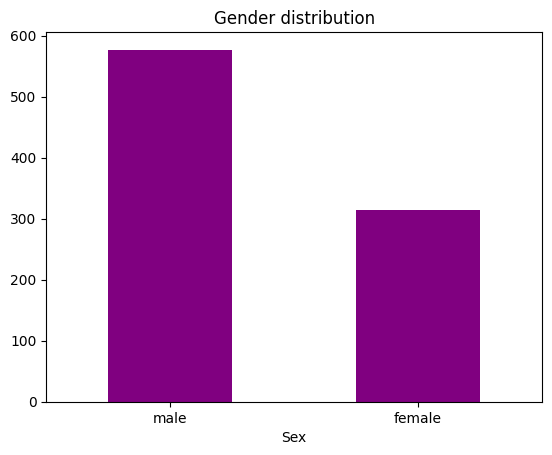

In [7]:
#Let's visualize the gender column
training_data["Sex"].value_counts().plot(kind = "bar", color = "purple")
plt.title("Gender distribution")
plt.xticks(rotation = 0);

It is observed that the number of male is more than the number of female.

In [8]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Let's drop the irrelevent columns
training_data.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [10]:
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Let's split the data into the x and y features
x = training_data.drop("Survived", axis = 1)
y = training_data["Survived"]

In [12]:
#Let's check for missing values
x.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
#Let's fill the age column with the mode()
x["Age"].mode()


0    24.0
Name: Age, dtype: float64

In [18]:
#The most frequently occurring value of the age is 24, so we fill the missing age column with 24.
x["Age"].fillna(24,inplace = True)

/tmp/ipykernel_33/2931712010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["Age"].fillna(24,inplace = True)


In [19]:
x.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [20]:
x["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [21]:
#Let's fill the embarked column as well
x["Embarked"].fillna("S", inplace = True)

/tmp/ipykernel_33/644729192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["Embarked"].fillna("S", inplace = True)


In [22]:
#check for missing values now again
x.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
#Now there are no more missing values in x. let's do the same with y
y.isna().sum()

0

In [24]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [27]:
x.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [28]:
#convert all categoricals into numericals
transformed_x = pd.get_dummies(x, dtype = float )
transformed_x.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [29]:
#Now since we finished with the preprocessing of our data, let's perform modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#split the data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(transformed_x, y, test_size = 0.2)

#instantiate the clf
clf = RandomForestClassifier(random_state = 42)

#fit the clf to our data
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
#use the score function for accuracy
clf.score(x_valid, y_valid)
print(f"The accuracy is: {clf.score(x_valid,y_valid)}%")

The accuracy is: 0.8044692737430168%


In [31]:
#Let's also use the logistic regression model
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

#instantiate the model
clf_log_reg = LogisticRegression(max_iter = 1000)

#fit the model
clf_log_reg.fit(transformed_x, y)

LogisticRegression(max_iter=1000)

In [32]:
#use score function
clf_log_reg.score(transformed_x, y)
print(f"The accuracy for logistic regression model is :{clf_log_reg.score(transformed_x, y)}%")

The accuracy for logistic regression model is :0.8024691358024691%


### Let's improve our model score by hyperparamter tuning
1. using randomized searchcv

In [33]:
#using randomized search cv
from sklearn.model_selection import RandomizedSearchCV

#create a parameters grid
clf_rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples": [100]}


#instantiate the randomized search cv for the RandomForestClassifier model

clf_cv = RandomizedSearchCV(estimator= RandomForestClassifier(),param_distributions = clf_rf_grid,
                   scoring = "accuracy", cv = 5, verbose = True, n_iter = 10, random_state = 42, n_jobs = -1)

#fit the grid to the data now
clf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [100],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring='accuracy', verbose=True)

In [34]:
#now find the best parameters
clf_cv.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 100,
 'max_features': 1,
 'max_depth': None}

In [35]:
#now let's create an ideal model using the best params and grid search cv
ideal_clf_model = RandomForestClassifier(n_estimators = 60,
                                        min_samples_split=12, min_samples_leaf =1,
                                        max_samples= 100, max_features = 1,
                                        max_depth = None, random_state = 42)

#now fit this model to the data
ideal_clf_model.fit(x_train, y_train)

RandomForestClassifier(max_features=1, max_samples=100, min_samples_split=12,
                       n_estimators=60, random_state=42)

In [37]:
#find the accuracy score of the ideal model
ideal_clf_model.score(x_train, y_train)

0.8370786516853933

### Initially the clf score was 0.80%, after the hyperparamter tuning we have improved it to atleast 83% and the logistic regression score is 80%

### Make predictions on the test data

In [46]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
#run some preprocessing of the data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
test_data.drop(["Name","Ticket","Cabin"], axis = 1, inplace = True)

In [50]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [51]:
#check for missing values
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [60]:
#fill the missing values
test_data["Age"].fillna(24, inplace = True)

/tmp/ipykernel_33/3056839192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(24, inplace = True)


In [61]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [65]:
#fill for the fare column
test_data["Fare"].fillna(test_data.Fare.median(), inplace = True)

In [66]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [67]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [68]:
#now let's convert all the categorical variables to numericals
transformed_test_data = pd.get_dummies(test_data, dtype = float)

In [69]:
transformed_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


### now we can predict on the test data


### 1. for the classification ideal model 2. for the logistic regression model

In [72]:
#for the clf_ideal_model
test_preds = ideal_clf_model.predict(transformed_test_data)
test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
len(test_preds)

418

In [92]:
transformed_test_data_1 = transformed_test_data

In [93]:
transformed_test_data_1["Survived"] = test_preds

In [94]:
transformed_test_data_1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0
1,893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0
3,895,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0
4,896,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0
414,1306,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,1
415,1307,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0
416,1308,3,24.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0


In [114]:
test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [129]:
transformed_test_data_1.Survived.value_counts()

Survived
0    292
1    126
Name: count, dtype: int64

In [130]:
submission = pd.DataFrame(columns= [transformed_test_data_1["PassengerId"], transformed_test_data_1["Survived"]])

In [132]:
submission = submission.T

In [133]:
submission.head()

,
PassengerId,Survived
892,0
893,0
894,0
895,0
896,0


In [139]:
submission.to_csv("clf.csv")

### logistic regression model

In [146]:
log_test_preds = clf_log_reg.predict(transformed_test_data)

In [145]:
transformed_test_data = transformed_test_data.drop("Survived", axis = 1)

In [147]:
log_test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [172]:
log_reg = pd.DataFrame(columns=[transformed_test_data.PassengerId])

In [174]:
log_reg = log_reg.T

In [175]:
log_reg

""
PassengerId
892
893
894
895
896
...
1305
1306
1307


In [177]:
transformed_test_data_2 = transformed_test_data

In [179]:
transformed_test_data_2["Survived"] = log_test_preds

In [181]:
log_reg = pd.DataFrame(columns=[transformed_test_data_2.PassengerId, transformed_test_data_2.Survived])

In [183]:
log_reg = log_reg.T

In [184]:
log_reg

,
PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [185]:
log_reg.to_csv("log_reg.csv")